# Lab 4: EM Algorithm and Single-Cell RNA-seq Data

### Name: Hyun Do Jung (hjung35)

### Due December 14, 2020 11:59 PM

#### Preamble (Don't change this)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

## Part 1 : Expectation-Maximization (EM) algorithm for transcript quantification

## Introduction

The EM algorithm is a very helpful tool to compute maximum likelihood estimates of parameters in models that have some latent (hidden) variables.
In the case of the transcript quantification problem, the model parameters we want to estimate are the transcript relative abundances $\rho_1,...,\rho_K$.
The latent variables are the read-to-transcript indicator variables $Z_{ik}$, which indicate whether the $i$th read comes from the $k$th transcript (in which case $Z_{ik}=1$.

In this part of the lab, you will be given the read alignment data.
For each read and transcript pair, it tells you whether the read can be mapped (i.e., aligned) to that transcript.
Using the EM algorithm, you will estimate the relative abundances of the trascripts.


### Reading read transcript data - We have 30000 reads and 30 transcripts

In [2]:
n_reads=30000
n_transcripts=30
read_mapping=[]
with open("read_mapping_data.txt",'r') as file :
    lines_reads=file.readlines()
for line in lines_reads :
    read_mapping.append([int(x) for x in line.split(",")])

In [3]:
read_mapping[:10]

[[7, 8, 9], [2], [20], [5], [3], [17], [25], [7, 8, 9], [6, 8, 9], [21, 23]]

Rather than giving you a giant binary matrix, we encoded the read mapping data in a more concise way. read_mapping is a list of lists. The $i$th list contains the indices of the transcripts that the $i$th read maps to.

### Reading true abundances and transcript lengths

In [4]:
with open("transcript_true_abundances.txt",'r') as file :
    lines_gt=file.readlines()
ground_truth=[float(x) for x in lines_gt[0].split(",")]

with open("transcript_lengths.txt",'r') as file :
    lines_gt=file.readlines()
tr_lengths=[float(x) for x in lines_gt[0].split(",")]

In [5]:
ground_truth[:5]

[0.0335217035814684,
 0.001451311771258088,
 0.06523041013235349,
 0.005042071648942626,
 0.013239743948342543]

In [6]:
tr_lengths[:5]

[4000.0, 4000.0, 3000.0, 3000.0, 1000.0]

## Graded Function 1 : expectation_maximization (10 marks) 

Purpose : To implement the EM algorithm to obtain abundance estimates for each transcript.

E-step :  In this step, we calculate the fraction of read that is assigned to each transcript (i.e., the estimate of $Z_{ik}$). For read $i$ and transicript $k$, this is calculated by dividing the current abundance estimate of transcript $k$ by the sum of abundance estimates of all transcripts that read $i$ maps to.

M-step :  In this step, we update the abundance estimate of each transcript based on the fraction of all reads that is currently assigned to the transcript. First we compute the average fraction of all reads assigned to the transcript. Then, (if transcripts are of different lengths) we divide the result by the transcript length.
Finally, we normalize all abundance estimates so that they add up to 1.

Inputs - read_mapping (which is a list of lists where each sublist contains the transcripts to which a particular read belongs to. The length of this list is equal to the no. of reads, i.e. 30000; tr_lengths (a list containing the length of the 30 transcripts, in order); n_iterations (the number of EM iterations to be performed)

Output - a list of lists where each sublist contains the abundance estimates for a transcript across all iterations. The length of each sublist should be equal to the no. of iterations plus one (for the initialization) and the total no. of sublists should be equal to the no. of transcripts.

In [111]:
def expectation_maximization(read_mapping,tr_lengths,n_iterations) :
    #fake_constants
    n_iter = n_iterations
    #print(n_iter)
    n_tr = len(tr_lengths)
    #print(n_tr)
    n_R = len(read_mapping)


    result = []
    rel_abunds = []
    #dic = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0, 5:0.0, 6:0.0, 7:0.0, 8:0.0, 9:0.0, 10:0.0, 11:0.0, 12:0.0, 13:0.0, 14:0.0, 15:0.0, 16:0.0, 17:0.0, 18:0.0, 19:0.0, 20:0.0, 21:0.0, 22:0.0, 23:0.0, 24:0.0, 25:0.0, 26:0.0, 27:0.0, 28:0.0, 29:0.0}
    #dic = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0, 5:0.0, 6:0.0, 7:0.0, 8:0.0, 9:0.0, 10:0.0, 11:0.0, 12:0.0, 13:0.0, 14:0.0}



    for i in range(n_tr):
        g = float("{:.20f}".format(1.0/n_tr))
        result.append([g])
        rel_abunds.append(g)

    #print(rel_abunds)



    for i in range(n_iter):
        #print("========================", i+1, "iteration processing============================")
        dic = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0, 5:0.0, 6:0.0, 7:0.0, 8:0.0, 9:0.0, 10:0.0, 11:0.0, 12:0.0, 13:0.0, 14:0.0, 15:0.0, 16:0.0, 17:0.0, 18:0.0, 19:0.0, 20:0.0, 21:0.0, 22:0.0, 23:0.0, 24:0.0, 25:0.0, 26:0.0, 27:0.0, 28:0.0, 29:0.0}

        """ 
        E STEP
        we have to get Zik value by reading rho_k from relative abundances
        In this step, we calculate the fraction of read that is assigned to each transcript (i.e., the estimate of  𝑍𝑖𝑘
    Z_ik). For read 𝑖 and transicript 𝑘, this is calculated by dividing the current abundance estimate of transcript  
    𝑘 by the sum of abundance estimates of all transcripts that read 𝑖 maps to.
        """

        #print("=========== E-STEP ============")


        for cur_read in read_mapping:
            #print("current read:", cur_read)

            tot_abund_trs = 0
            #print("ZERO  tot_abund_trs:", tot_abund_trs)

            #find denominator; sum of relative abundances
            for tr_idx_1 in cur_read:
                tot_abund_trs += rel_abunds[tr_idx_1]
                #print("tot_abund_trs:", tot_abund_trs)

            #print("Sum abundance(denominator): ", tot_abund_trs)

            #finding intermediate Z_ik value for each read maps
            for tr_idx_2 in cur_read:
                Zik = rel_abunds[tr_idx_2] / tot_abund_trs
                #print(tr_idx, rel_abunds[tr_idx_2], tot_abund_trs, Zik)

                #"""THIS IS FOR M STEP where we want summation of all Zik for each k transcript"""
                # summing up each transcript k's Z_ik value using dict 
                dic[tr_idx_2] += Zik
                #print(dic, end='\n\n')


        """ Estep 까지는 괜찮아 보임 """

        #print("=========== M-STEP ============")

        Sum = 0.0

        # iteration from 0 to 29, find Sum of Zik
        for tr_idx_3 in dic:
            #print("tr_idx:",tr_idx_3)
            #current Z_ik value starting from 0 to 29
            cur_Z_ik = dic[tr_idx_3]

            #new rho_k calculation
            rho_k = float("{:.20f}".format(cur_Z_ik / (n_R * tr_lengths[tr_idx_3])))
            #print(cur_Z_ik, n_R, tr_lengths[tr_idx_3], rho_k)

            Sum += rho_k
            #print("current Sum of Rho_k's:", Sum)


        norm_const = 1.0/Sum
        norm_const = float("{:.20f}".format(norm_const))
        #print("norm_const:", norm_const)

        #normalization
        for tr_idx_4 in dic:
            #print("tr_idx:",tr_idx_4)

            cur_Z_ik = dic[tr_idx_4]
            rho_k = float("{:.20f}".format(cur_Z_ik / (n_reads * tr_lengths[tr_idx_4])))

            norm_k = norm_const * rho_k
            #print(cur_Z_ik, n_R, tr_lengths[tr_idx_4], rho_k, norm_const, norm_k)
            #print("old rel abund: ",rel_abunds[tr_idx_4])
            rel_abunds[tr_idx_4] = norm_k
            #print("new rel abund: ", rel_abunds[tr_idx_4])


            result[tr_idx_4].append(norm_k)
        
    #print("iteration updated rel_abunds:", rel_abunds, end='\n\n')
    #print("current dic: ", dic, end='\n\n')
    

    return result


    
    #end code here

In [112]:
history=expectation_maximization(read_mapping,tr_lengths,20)
print(len(history))
print(len(history[0]))
print(history[0][-5:])
print(history[1][-5:])
print(history[2][-5:])

30
21
[0.033769639494636614, 0.033812986247833035, 0.03384568373972949, 0.033870348239314806, 0.03388895326082054]
[0.0020082674603036023, 0.0019649207071071447, 0.0019322232152109936, 0.0019075587156241894, 0.0018889536941198402]
[0.0660581789629968, 0.06606927656035866, 0.0660765012689558, 0.06608120466668757, 0.0660842666518177]


## Expected Output - 

30

21

[0.033769639494636614, 0.03381298624783303, 0.03384568373972948, 0.0338703482393148, 0.03388895326082054]

[0.0020082674603036053, 0.0019649207071071456, 0.0019322232152109925, 0.0019075587156241912, 0.0018889536941198502]

[0.0660581789629968, 0.06606927656035864, 0.06607650126895578, 0.06608120466668756, 0.0660842666518177]

## Graded Function 2 : visualize_em (10 marks)

Purpose : To plot the trajectories of the abundance estimate of each transcript with the number of iterations. To see whether the abundances are converging to the ground truth, you should plot the difference between the abundance estimates for a given transcript (say, ``history[k]``) and the ground truth ``ground_truth[k]``

Input - a list of lists where each sublist contains the abundance estimates for a transcript across all iterations. The length of each sublist should be equal to the no. of iterations and the total no. of sublists should be equal to the no. of transcripts.

In [113]:
def visualize_em(history,n_iterations) :
    #start code here
    plt.figure()

    for i in range(len(history)):
        #print("i:", i)
        temp=[]
        for j in range(n_iterations):
            #print(j)

            x = history[i][j] - ground_truth[i]
            #print(x)
            temp.append(x)
        plt.plot(temp, linestyle='-.')


    plt.show()
    
    
    #end code here

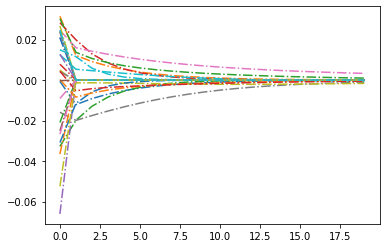

In [114]:
visualize_em(history,20)

## Expected Output -

![expected_plot.png](expected_plot.png)

## Part 2 : Exploring Single-Cell RNA-seq data

In a study published in 2015, Zeisel et al. used single-cell RNA-seq data to explore the cell diversity in the mouse brain. 
We will explore the data used for their study.
You can read more about it [here](https://science.sciencemag.org/content/347/6226/1138).

In [16]:
#reading single-cell RNA-seq data
lines_genes=[]
with open("Zeisel_expr.txt",'r') as file :
    lines_genes=file.readlines()

In [17]:
lines_genes[0][:300]

'0 0 0 3 0 0 3 0 0 0 2 0 0 0 0 0 4 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 2 0 0 1 2 6 7 2 0 0 0 2 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 3 13 2 1 2 1 0 3 2 0 0 2 1 0 0 2 3 6 0 1 5 0 0 1 1 4 0 4 0 1 0 0 1 2 5 0 0 5 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 3 1 0 0 2 0 0'

Each line in the file Zeisel_expr.txt corresponds to one gene.
The columns correspond to different cells (notice that this is the opposite of how we looked at this matrix in class).
The entries of this matrix correspond to the number of reads mapping to a given gene in the corresponding cell.

In [18]:
# reading true labels for each cell
with open("Zeisel_labels.txt",'r') as file :
    true_labels = file.read().splitlines()

The study also provides us with true labels for each of the cells.
For each of the cells, the vector true_labels contains the name of the cell type.
There are nine different cell types in this dataset.

In [19]:
set(true_labels)

{'Astrocytes',
 'CA1 Pyrimidal',
 'Endothelial',
 'Ependymal',
 'Interneurons',
 'Microglia',
 'Mural',
 'Oligodentrocytes',
 'S1 Pyrimidal'}

## Graded Function 3 : prepare_data (10 marks) :

Purpose - To create a dataframe where each row corresponds to a specific cell and each column corresponds to the expressions levels of a particular gene across all cells. 
You should name the columns as "Gene_1", "Gene_2", and so on.

We will iterate through all the lines in lines_genes list created above, add 1 to each value and take log.

Each line will correspond to 1 column in the dataframe

Output - gene expression dataframe

In [20]:
def prepare_data() :
    #start code here
    df=pd.DataFrame()


    for i in range(len(lines_genes)):
        col_name = 'Gene_' + str(i)

        line = lines_genes[i].strip().split()

        # loop to find each digit entry
        col_temp = []
        for i in range(len(line)):    
            entry = np.int(line[i])
            entry += 1
            entry = np.log(entry)
            col_temp.append(entry)
        #print(col_temp)
        df[col_name] = col_temp

    return df
    #end code here

In [21]:
data_df=prepare_data()
print(data_df.shape)
print(data_df.iloc[0:3,:5])

(3005, 19972)
   Gene_0    Gene_1    Gene_2  Gene_3    Gene_4
0     0.0  1.386294  1.386294     0.0  0.693147
1     0.0  0.693147  0.693147     0.0  0.693147
2     0.0  0.000000  1.945910     0.0  0.693147


## Expected Output :

``(3005, 19972)``

``   Gene_0    Gene_1    Gene_2  Gene_3    Gene_4``
   
``0     0.0  1.386294  1.386294     0.0  0.693147``

``1     0.0  0.693147  0.693147     0.0  0.693147``

``2     0.0  0.000000  1.945910     0.0  0.693147``

## Graded Function 4 : identify_less_expressive_genes (10 marks)

Purpose : To identify genes (columns) that are expressed in less than 25 cells. We will create a list of all gene columns that have values greater than 0 for less than 25 cells.

Input - gene expression dataframe

Output - list of column names which are expressed in less than 25 cells

In [22]:
def identify_less_expressive_genes(df) :
    #start code here
    
    result = []
    
    for i in range(df.shape[1]):
        temp = []
        cnt = 0 
        limit = 25
        
        for j in range(df.shape[0]):

            col_name = df.columns[i]

            if df[col_name][j] > 0:
                cnt += 1
                
                if(cnt == limit):
                    break
                    
        if cnt < limit:
            result.append(col_name)
                
    return result
    
    #end code here

In [23]:
drop_columns = identify_less_expressive_genes(data_df)
print(len(drop_columns))
print(drop_columns[:10])

KeyboardInterrupt: 

## Expected Output : 

``5120`` 

``['Gene_28', 'Gene_126', 'Gene_145', 'Gene_146', 'Gene_151', 'Gene_152', 'Gene_167', 'Gene_168', 'Gene_170', 'Gene_173']``

### Filtering less expressive genes

We will now create a new dataframe in which genes which are expressed in less than 25 cells will not be present

In [371]:
df_new = data_df.drop(drop_columns, axis=1)

In [372]:
df_new.head()

,Gene_0,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,...,Gene_19947,Gene_19948,Gene_19951,Gene_19952,Gene_19953,Gene_19955,Gene_19956,Gene_19957,Gene_19959,Gene_19960
0,0.000000,1.386294,1.386294,0.0,0.693147,0.0,0.000000,2.484907,0.693147,0.0,...,2.079442,0.0,0.000000,0.0,0.0,1.791759,0.0,0.0,0.0,0.000000
1,0.000000,0.693147,0.693147,0.0,0.693147,0.0,0.000000,0.000000,0.000000,0.0,...,0.693147,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,1.945910,0.0,0.693147,0.0,1.098612,3.258097,0.693147,0.0,...,0.693147,0.0,1.098612,0.0,0.0,1.386294,0.0,0.0,0.0,2.079442
3,1.386294,1.098612,1.609438,0.0,0.000000,0.0,1.386294,0.693147,0.000000,0.0,...,1.386294,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,1.098612,0.693147,0.0,0.000000,0.0,0.000000,2.397895,0.000000,0.0,...,0.000000,0.0,1.609438,0.0,0.0,1.386294,0.0,0.0,0.0,0.000000


## Graded Function 5 :  perform_pca (10 marks)

Pupose - Perform Principal Component Analysis on the new dataframe and take the top 50 principal components

Input - df_new

Output - numpy array containing the top 50 principal components of the data.

In [ ]:
def perform_pca(df) :
    #start code here
    
    #end code here

In [420]:
fd = df_new.iloc[:,:3000]
#print(fd)
data = fd[fd.columns[:]]

pca = PCA(n_components=50)
pca_fit = pca.fit(data)

print(pca_fit.shape)
print(type(pca_fit))
print(pca_fit[0:3,:5])


AttributeError: 'PCA' object has no attribute 'shape'

In [ ]:
fd = df_new.iloc[:,:]
#print(fd.columns[0].shape)\
#fd = df_new
print(fd.shape)
result =[]




for i in range(fd.shape[1]):


    col_name = fd.columns[i]
    x = fd.drop([col_name], axis=1).values
    y = fd[col_name].values
    #print(x.shape)
    pca = PCA(n_components=50)
    principalComponents = pca.fit_transform(x)
    
        #print(x)
        #pca=PCA(n_components = 1)
        #pC=pca.fit_transform(fd)
        #pca.fit(fd[col_name])
        #print(pC)
        #result.append([pC])
print(principalComponents.shape)
print(type(principalComponents))
print(principalComponents[0:3,:5])

(3005, 14852)


In [ ]:
pca_data=perform_pca(df_new)
print(pca_data.shape)
print(type(pca_data))
print(pca_data[0:3,:5])

## Expected Output : 

``(3005, 50)``

``<class 'numpy.ndarray'>``

``[[26.9714913  -2.72440136  0.62164446 25.90148292 -6.24736945]``

`` [26.49135772 -1.58774171 -4.79314022 24.01094206 -7.25618285]``
 
`` [47.82665332  5.06798931  2.15178143 30.24366515 -3.38878807]]``

## Graded Function 6 :  perform_tsne (10 marks)

Pupose - Perform t-SNE on the pca_data and obtain 2 t-SNE components

We will use TSNE class of the sklearn.manifold package. Use random_state=1000 and perplexity=50

Documenation can be found here - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Input - pca_data

Output - numpy array containing the top 2 tsne components of the data.

In [ ]:
def perform_tsne(pca_data) :
    #start code here
    
    #end code here

In [ ]:
tsne_data50 = perform_tsne(pca_data)
print(tsne_data50.shape)
print(tsne_data50[:3,:])

## Expected Output :

(These numbers can deviate a bit depending on your sklearn)

``(3005, 2)``

``[[ 15.069608 -47.535984]``

`` [ 15.251476 -47.172073]``
 
`` [ 13.3932   -49.909657]]``

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(tsne_data50[:,0], tsne_data50[:,1], hue=true_labels)
plt.show()

Notice that the different cell types form clusters (which can be easily visualized on the t-SNE space).
Zeisel et al. performed clustering on this data in order to identify and label the different cell types.

You can try using clustering methods discussed in the first module of the course (such as k-means) to cluster the single-cell RNA-seq data of Zeisel at al. and see if your results agree with theirs!